In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
 
from scipy import stats
 
import warnings
warnings.filterwarnings('ignore')
 
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/My Drive/ColabDataset/Flight Fare/Concatenate_B2C_B2E.csv')  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
size =(19,9)
sns.set_style('darkgrid')

In [ ]:
len(data)

278466

In [ ]:
data.head()

,InvoiceDate,NetFare,ProductType,ItineraryType
0,01-12-2018 11:43,2160,Other Product,Domestic
1,01-12-2018 11:43,0.49,Other Product,Domestic
2,01-12-2018 13:01,6550,Air,Domestic
3,01-12-2018 13:10,6550,Air,Domestic
4,30-11-2018 14:30,5497,Air,Domestic


In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format="%d-%m-%Y %H:%M")

In [ ]:
data.sort_values(by='InvoiceDate',inplace=True)

In [ ]:
data

,InvoiceDate,NetFare,ProductType,ItineraryType
186886,2018-04-01 08:26:00,8222,Air,Domestic
186887,2018-04-01 09:17:00,3418,Air,Domestic
186888,2018-04-01 09:54:00,6708,Air,Domestic
186889,2018-04-01 12:00:00,3625,Air,Domestic
186890,2018-04-01 12:36:00,3099,Air,Domestic
...,...,...,...,...
186883,2019-06-10 23:51:00,NaN,payment,Domestic
186885,2019-06-10 23:52:00,5004,Air,Domestic
186884,2019-06-10 23:52:00,0,Charge,NaN
180141,NaT,NaN,NaN,NaN


In [ ]:
data = data[data['ProductType']=='Air']

In [ ]:
data['InvoiceTime'] = data['InvoiceDate'].dt.time
data['InvoiceDate'] = data['InvoiceDate'].dt.date

# New Section

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceTime'] = pd.to_timedelta(data['InvoiceTime'].astype(str))

In [ ]:
len(data)

151995

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151995 entries, 186886 to 186885
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   InvoiceDate    151995 non-null  datetime64[ns] 
 1   NetFare        151995 non-null  object         
 2   ProductType    151995 non-null  object         
 3   ItineraryType  151995 non-null  object         
 4   InvoiceTime    151995 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), object(3), timedelta64[ns](1)
memory usage: 7.0+ MB


In [ ]:
data.describe(include='object')

,NetFare,ProductType,ItineraryType
count,151995.0,151995,151995
unique,27145.0,1,2
top,0.0,Air,Domestic
freq,589.0,151995,141234


In [ ]:
data.head()

,InvoiceDate,NetFare,ProductType,ItineraryType,InvoiceTime
186886,2018-04-01,8222,Air,Domestic,08:26:00
186887,2018-04-01,3418,Air,Domestic,09:17:00
186888,2018-04-01,6708,Air,Domestic,09:54:00
186889,2018-04-01,3625,Air,Domestic,12:00:00
186890,2018-04-01,3099,Air,Domestic,12:36:00


In [ ]:
data['NetFare'] = data['NetFare'].astype(float)

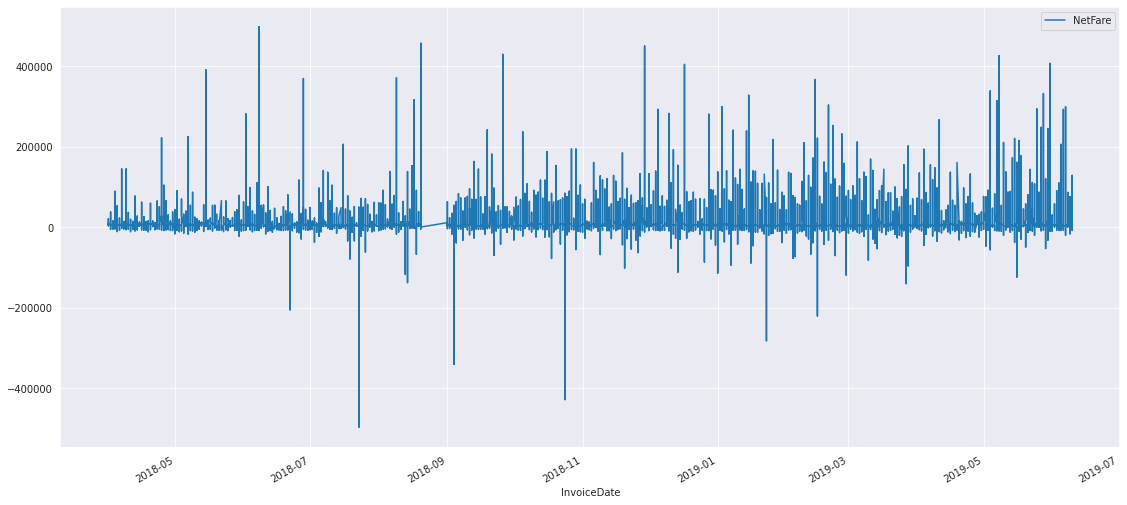

In [ ]:
data.plot(x='InvoiceDate',y='NetFare',figsize=(19,9))

As from our Previous EDA Notebook and Domain knowledge we will drop the Negative Value from NetFare

In [ ]:
data = data[data['NetFare']>0]

In [ ]:
data

,InvoiceDate,NetFare,ProductType,ItineraryType,InvoiceTime
186886,2018-04-01,8222.0,Air,Domestic,08:26:00
186887,2018-04-01,3418.0,Air,Domestic,09:17:00
186888,2018-04-01,6708.0,Air,Domestic,09:54:00
186889,2018-04-01,3625.0,Air,Domestic,12:00:00
186890,2018-04-01,3099.0,Air,Domestic,12:36:00
...,...,...,...,...,...
186872,2019-06-10,3673.0,Air,Domestic,23:17:00
186874,2019-06-10,5229.0,Air,Domestic,23:29:00
186877,2019-06-10,3600.0,Air,Domestic,23:31:00
186880,2019-06-10,2547.0,Air,Domestic,23:37:00


In [ ]:
data.isna().sum()

InvoiceDate      0
NetFare          0
ProductType      0
ItineraryType    0
InvoiceTime      0
dtype: int64

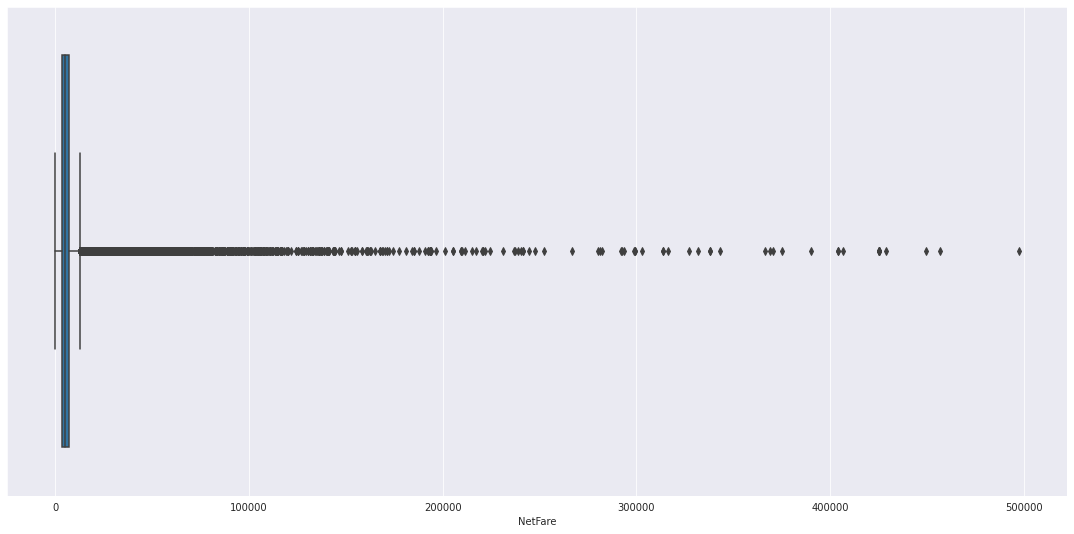

In [ ]:
plt.figure(figsize=size)

sns.boxplot(data['NetFare'])

plt.show()

Now Splitting the dataset into two part 



1.   Domestic
2.   International



In [ ]:
domesticData = data[data['ItineraryType']=='Domestic'][['InvoiceDate','NetFare']]
interData = data[data['ItineraryType']=='International'][['InvoiceDate','NetFare']]

In [ ]:
len(domesticData)

134001

In [ ]:
len(interData)

10261

In [ ]:
domesticData.isna().sum()

InvoiceDate    0
NetFare        0
dtype: int64

In [ ]:
interData.isna().sum()

InvoiceDate    0
NetFare        0
dtype: int64

In [ ]:
print(domesticData.describe())
print()
print(interData.describe())

             NetFare
count  134001.000000
mean     5198.692509
std      2999.433388
min         1.000000
25%      3211.000000
50%      4640.000000
75%      6582.000000
max     64131.000000

             NetFare
count   10261.000000
mean    23626.767777
std     32628.212892
min        19.070000
25%      7416.000000
50%     15190.000000
75%     27665.000000
max    497678.000000


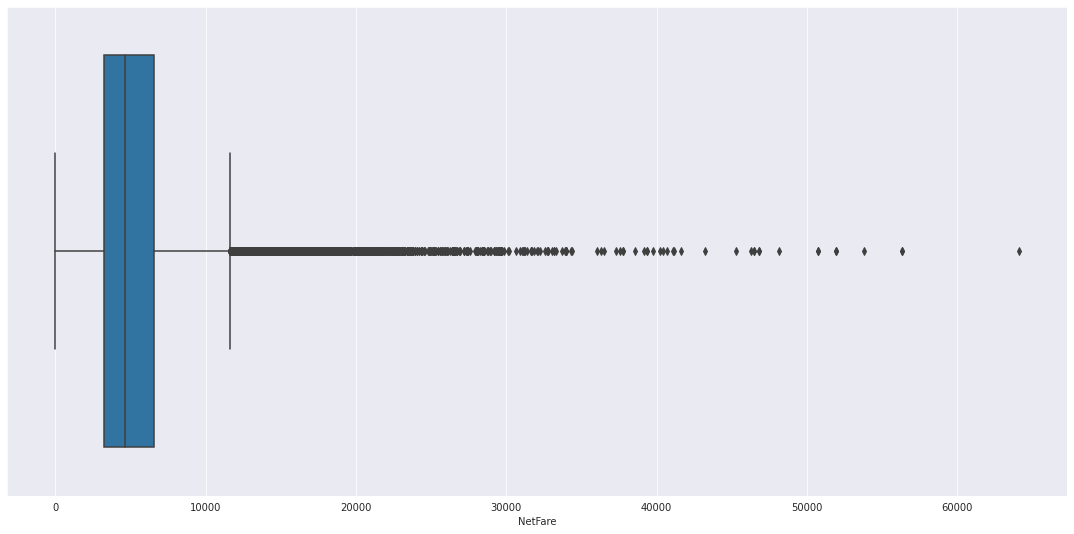

In [ ]:
plt.figure(figsize=size)

sns.boxplot(domesticData['NetFare'])

plt.show()

Now Lets Remove Outliers for Domestic

In [ ]:
z = pd.DataFrame(stats.zscore(domesticData['NetFare']).astype(float),columns=['z'])
d = z.describe()
d.iloc[6]

z    0.461191
Name: 75%, dtype: float64

We can see that 75% of data under 0.0452 

so we  will remove all tha above that threshold

In [ ]:
domesticData['zScore'] = z['z'].values
domesticData = domesticData[domesticData['zScore']<=0.461191]

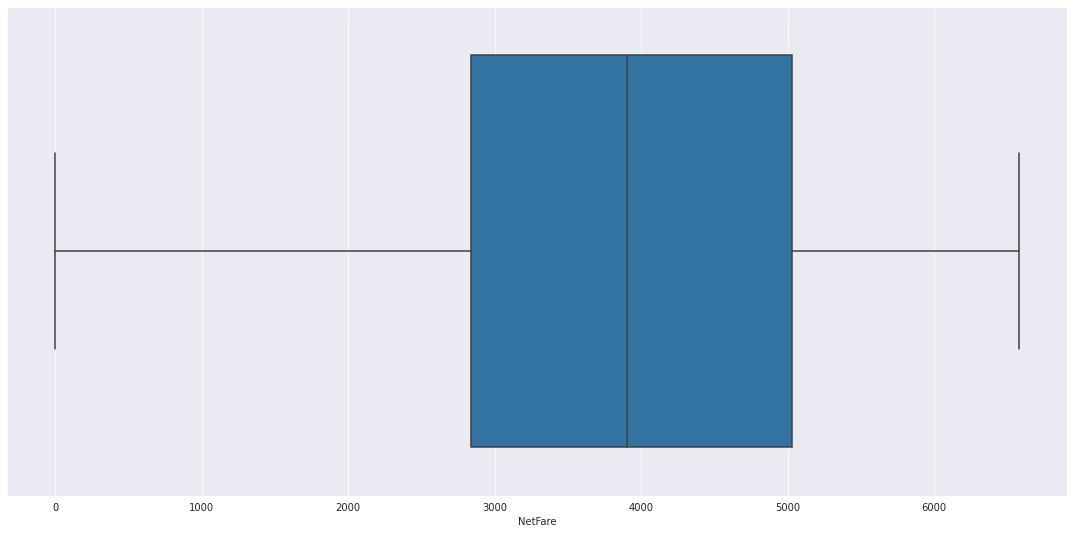

In [ ]:
plt.figure(figsize=size)

sns.boxplot(domesticData['NetFare'])

plt.show()

In [ ]:
domesticData.isna().sum()

InvoiceDate    0
NetFare        0
zScore         0
dtype: int64

Now Removing Outliers for Inter-National 

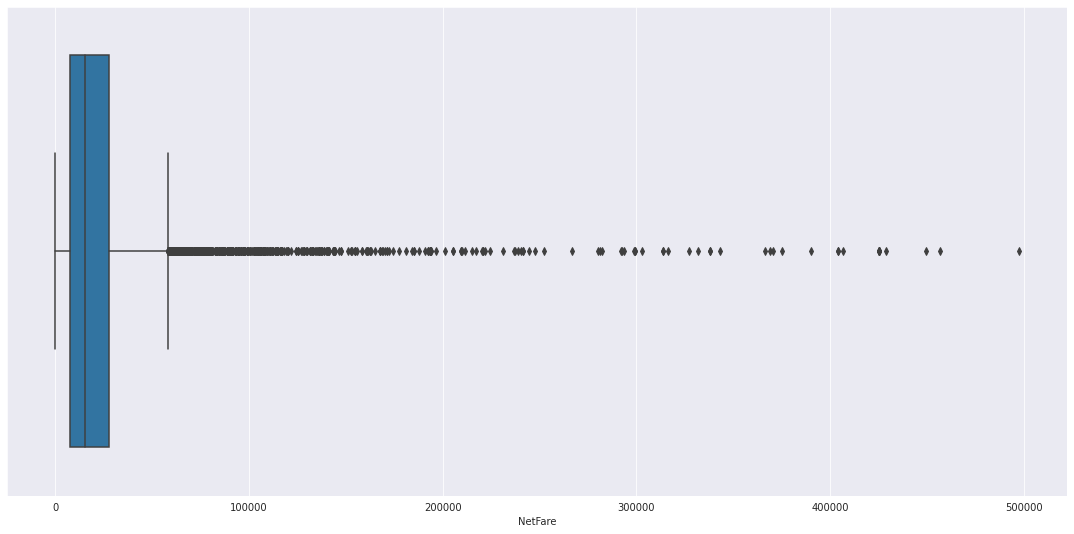

In [ ]:
plt.figure(figsize=size)

sns.boxplot(interData['NetFare'])

plt.show()

In [ ]:
z = pd.DataFrame(stats.zscore(interData['NetFare']).astype(float),columns=['z'])
d = z.describe()
d.iloc[6]

z    0.123771
Name: 75%, dtype: float64

In [ ]:
interData['zScore'] = z['z'].values
interData = interData[interData['zScore']<=0.123771]
interData

,InvoiceDate,NetFare,zScore
186902,2018-04-01,20918.0000,-0.083023
186903,2018-04-01,16676.0000,-0.213040
186904,2018-04-01,16676.0000,-0.213040
187224,2018-04-05,22445.0000,-0.036221
187331,2018-04-05,15193.0000,-0.258493
...,...,...,...
186716,2019-06-10,2499.0000,-0.647562
186768,2019-06-10,3816.1854,-0.607191
186769,2019-06-10,3816.1854,-0.607191
186770,2019-06-10,3816.1854,-0.607191


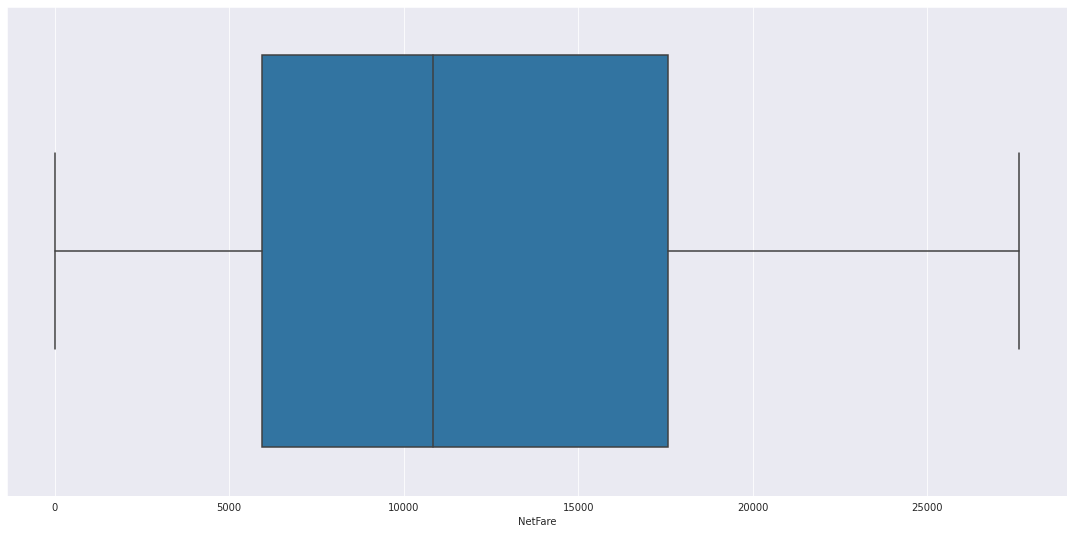

In [ ]:
plt.figure(figsize=size)

sns.boxplot(interData['NetFare'])

plt.show()

In [ ]:
interData.isna().sum()

InvoiceDate    0
NetFare        0
zScore         0
dtype: int64

Now lets Resample the Domestic Dataset and International dataset by Mean and **Total** 

In [ ]:
domesticData.drop('zScore',1,inplace=True)
interData.drop('zScore',1,inplace=True)

In [ ]:
domesticData.set_index('InvoiceDate',inplace=True)

In [ ]:
mean = domesticData.resample('D').mean().ffill()
total = domesticData.resample('D').sum().ffill()
#len(mean) -- > 436
#len(total) -- >436

mean.columns = ['AvgNetFare']
total.columns = ['TotalNetFare']

print(mean.isna().sum())
print(total.isna().sum())

AvgNetFare    0
dtype: int64
TotalNetFare    0
dtype: int64


In resampling method of pandas it fill the missing Dates or month even if there is no such row in original dataset and gives NaN value for the variable 

So we use ffill() (forward Fill) method to fill those missing NaN values 

In [ ]:
finalDomesticData = mean.join(total)
finalDomesticData

,AvgNetFare,TotalNetFare
InvoiceDate,,
2018-04-01,4276.300000,85526.0
2018-04-02,4197.466667,251848.0
2018-04-03,4163.578125,266469.0
2018-04-04,4112.812500,329025.0
2018-04-05,3977.666667,369923.0
...,...,...
2019-06-06,3659.568144,2228677.0
2019-06-07,3563.161905,2244792.0
2019-06-08,3426.708642,1387817.0


International Dataset Resampling with **Mean** and Total

In [ ]:
interData.set_index('InvoiceDate',inplace=True)

In [ ]:
interData.isna().sum()

NetFare    0
dtype: int64

In [ ]:
mean = interData.resample('D').mean().ffill()
total = interData.resample('D').sum().ffill()
#len(mean) -- > 436
#len(total) -- >436

mean.columns = ['AvgNetFare']
total.columns = ['TotalNetFare']

print(mean.isna().sum())
print(total.isna().sum())

AvgNetFare    0
dtype: int64
TotalNetFare    0
dtype: int64


In [ ]:
finalInternationalData = mean.join(total)
finalInternationalData

,AvgNetFare,TotalNetFare
InvoiceDate,,
2018-04-01,18090.000000,54270.0000
2018-04-02,18090.000000,0.0000
2018-04-03,18090.000000,0.0000
2018-04-04,18090.000000,0.0000
2018-04-05,17610.333333,52831.0000
...,...,...
2019-06-06,15922.467391,366216.7500
2019-06-07,12941.017667,388230.5300
2019-06-08,13275.043404,623927.0400


In [ ]:
finalInternationalData.to_csv('/content/drive/My Drive/ColabDataset/Flight Fare/FinalInternatioalDataset.csv',index=True)

In [ ]:
finalDomesticData.to_csv('/content/drive/My Drive/ColabDataset/Flight Fare/FinalDomesticDataset.csv',index=True)